<a href="https://colab.research.google.com/github/Horcruxno13/Multi-Class-Text-Classification-using-BERT-and-PyTorch/blob/main/ECommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ecom_df = pd.read_csv('/content/drive/My Drive/Datasets/ecommerceDataset.csv', names = ["Category", "Description"])

In [ ]:
ecom_df.head()

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     50425 non-null  object
 1   Description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [ ]:
ecom_df.groupby(["Category"])["Category"].count()

Category
Books                     11820
Clothing & Accessories     8671
Electronics               10621
Household                 19313
Name: Category, dtype: int64

In [ ]:
dupdf = ecom_df.pivot_table(index = ["Description"], aggfunc = "size")

In [ ]:
len(dupdf)

27802

In [ ]:
ecom_df.dropna(inplace = True) 
ecom_df.drop_duplicates(inplace = True) 
ecom_df.reset_index(drop = True, inplace = True) 

In [ ]:
ecom_df.groupby(["Category"])["Category"].count()

Category
Books                      6256
Clothing & Accessories     5674
Electronics                5308
Household                 10564
Name: Category, dtype: int64

In [ ]:
ecom_df['Length'] = ecom_df['Description'].apply(lambda x: len(x.split()))

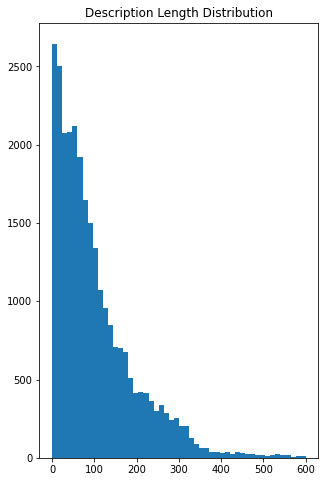

In [ ]:
plt.figure(figsize=(5, 8))
plt.hist(ecom_df['Length'], bins = 50, range = (0, 600))
plt.title('Description Length Distribution')
plt.show()

In [ ]:
ecom_df[ecom_df["Length"] == 1]

,Category,Description,Length
10424,Household,Sourcery,1
10937,Books,Universe,1
11257,Books,Panorama,1
11561,Books,#Horror,1
11710,Books,Ramayana,1
11917,Books,Environment,1
12584,Books,Dracula,1
12636,Books,Essays,1
12739,Books,Siddhartha,1
13299,Books,Meditations,1


In [ ]:
books = ecom_df[ecom_df["Category"] == "Books"]
clothing = ecom_df[ecom_df["Category"] == "Clothing & Accessories"] 
electronics = ecom_df[ecom_df["Category"] == "Electronics"]
household = ecom_df[ecom_df["Category"] == "Household"]

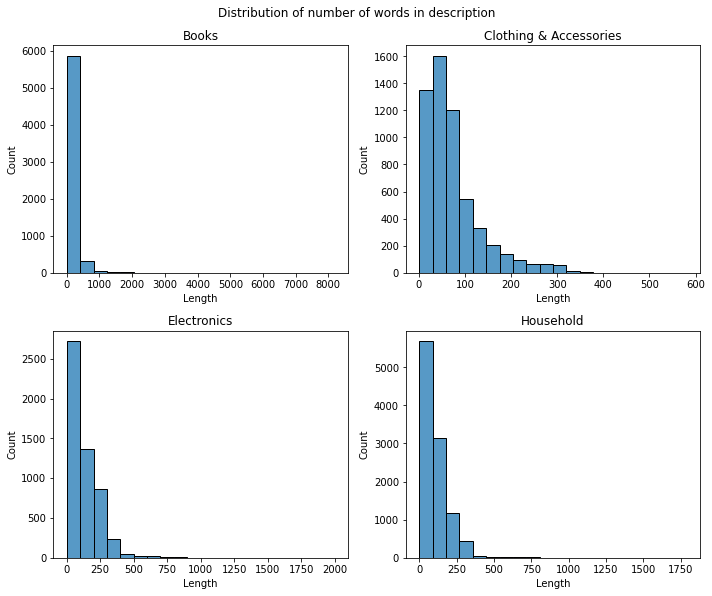

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = books["Length"], bins = 20, ax = ax[0, 0]).set_title('Books')
sns.histplot(x = clothing["Length"], bins = 20, ax = ax[0, 1]).set_title('Clothing & Accessories')
sns.histplot(x = electronics["Length"], bins = 20, ax = ax[1, 0]).set_title('Electronics')
sns.histplot(x = household["Length"], bins = 20, ax = ax[1, 1]).set_title('Household')
fig.suptitle("Distribution of number of words in description")
fig.tight_layout()

In [ ]:
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def convert_to_lowercase(text):
    return text.lower()

def remove_whitespace(text):
    return text.strip()

def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

def remove_stopwords(text):
    regexp = RegexpTokenizer("[\w']+")
    return " ".join([word for word in regexp.tokenize(text) if word not in stopwords])

def discard_non_alpha(text):
    regexp = RegexpTokenizer("[\w']+")
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    return text_spacy

In [ ]:
def cleaning(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_stopwords(text) 
    text = discard_non_alpha(text)
    text = text_lemmatizer(text)
    return text

In [ ]:
ecom_df["Description"] = ecom_df["Description"].apply(cleaning)

In [ ]:
ecom_df["Description"].head()

0    paper plane design frame wall hang motivationa...
1    saf frame paint wood inch x inch special effec...
2    saf texture modern art print paint synthetic c...
3    saf flower print frame paint synthetic inch x ...
4    incredible gift india wooden happy birthday un...
Name: Description, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labels = LabelEncoder()

In [ ]:
labels.fit(ecom_df["Category"])

LabelEncoder()

In [ ]:
ecom_df["Labels"] = labels.transform(ecom_df["Category"])

In [ ]:
ecom_df.head()

,Category,Description,Length,Labels
0,Household,paper plane design frame wall hang motivationa...,228,3
1,Household,saf frame paint wood inch x inch special effec...,59,3
2,Household,saf texture modern art print paint synthetic c...,224,3
3,Household,saf flower print frame paint synthetic inch x ...,184,3
4,Household,incredible gift india wooden happy birthday un...,184,3


In [ ]:
X = ecom_df["Description"].values
y = ecom_df["Labels"].values

In [ ]:
ecom_df.to_csv("/content/drive/My Drive/Datasets/ecommerceCleaned.csv")

In [ ]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 86.7 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
input_ids = []
for line in X:
    line = line[:512]
    encoded = tokenizer.encode(line, add_special_tokens = True)
    input_ids.append(encoded)

In [ ]:
MAX_LENGTH = 512 
input_ids = pad_sequences(input_ids, maxlen=MAX_LENGTH, dtype="long", value=0, truncating="post", padding="post")

In [ ]:
attention_masks = []
for line in input_ids:
    mask = [int(token_id > 0) for token_id in line]
    attention_masks.append(mask)

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
input_train, input_remain, label_train, label_remain = train_test_split(input_ids, y, test_size=0.3, random_state=42)
input_valid, input_test, label_valid, label_test = train_test_split(input_remain, label_remain, test_size=0.5, random_state=42)

mask_train, mask_remain, _, _ = train_test_split(attention_masks, y, test_size=0.3, random_state=42)
mask_valid, mask_test, _, _ = train_test_split(mask_remain, label_remain, test_size=0.5, random_state=42)

In [ ]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

In [ ]:
batch_size = 8

trainset = TensorDataset(torch.tensor(input_train), torch.tensor(label_train), torch.tensor(mask_train))
validset = TensorDataset(torch.tensor(input_valid), torch.tensor(label_valid), torch.tensor(mask_valid))
testset = TensorDataset(torch.tensor(input_test), torch.tensor(label_test), torch.tensor(mask_test))

trainloader = DataLoader(trainset, shuffle=True, batch_size=batch_size)
valloader = DataLoader(validset, shuffle=True, batch_size=batch_size)
testloader = DataLoader(testset, shuffle=True, batch_size=batch_size)

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels = 4,  output_attentions = False, output_hidden_states = False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
optimizer = AdamW(model.parameters(), lr = 2e-5, eps = 1e-8)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import random
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
epochs = 4
epochloop = tqdm(range(epochs), position=0, desc='Training', leave=True)
for e in epochloop:
  model.train()
  train_loss = 0
  train_acc = 0

  for id, batch in enumerate(trainloader):
    inputids = batch[0].to(device)
    inputlabels = batch[1].to(device)
    inputmasks = batch[2].to(device)

    model.zero_grad()
    outputs = model(inputids, token_type_ids=None, attention_mask = inputmasks, labels = inputlabels)
    
    loss = outputs[0]
    train_loss = train_loss + loss.item()
    #equals = outputs == inputlabels
    #acc = torch.mean(torch.FloatTensor(equals))
    #train_acc = train_acc + acc.item()
    #loss = criterion(outputs.squeeze(), labels.float())
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    del inputids, inputlabels, inputmasks

  history['train_loss'].append(train_loss / len(trainloader))
  #history['train_acc'].append(train_acc / len(trainloader))
  print("Training Loss", history['train_loss'])
  #print("Training Accuracy", history['train_acc'])

  model.eval()
  val_loss = 0
  val_acc = 0
  nb_eval_steps = 0

  for batch in valloader:
    batch = tuple(t.to(device) for t in batch)
    inputids = batch[0]
    inputlabels = batch[1]
    inputmasks = batch[2]

    with torch.no_grad():
      outputs = model(inputids, token_type_ids=None, attention_mask = inputmasks)
      #equals = outputs == inputlabels
      logits = outputs[0]
      logits = logits.detach().cpu().numpy()
      label_ids = inputlabels.to('cpu').numpy()
      tmp_eval_accuracy = flat_accuracy(logits, label_ids)
      #acc = torch.mean(equals.type(torch.FloatTensor))
      #val_acc = val_acc + acc.item()
      #loss = criterion(outputs.squeeze(), labels.float())
      #val_loss = val_loss + loss.item()
      nb_eval_steps += 1

  
  #history['val_loss'].append(val_loss / len(valloader))
  history['val_acc'].append(val_acc / nb_eval_steps)
  #print("Validation Loss", history['val_loss'])
  print("Validation Accuracy", history['val_acc'])

Training:   0%|          | 0/4 [00:00<?, ?it/s]